### PREPROCESSING OF TAIWAN CREDIT DATASET

In [1]:
import numpy as np
import pandas as pd
import sklearn 
import imblearn
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import classification_report, confusion_matrix
import math 
from IPython.display import Markdown, display

In [2]:
taiwan_data = pd.read_csv('taiwan.csv')
print(taiwan_data)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [3]:
# change sex (currently 1 = male, 2 is female) to 0 = male and 1 = female 
taiwan_data['SEX'] = taiwan_data['SEX'].replace([1,2],[0,1])

#Change default on payment (currently yes = 1 and no = 0, desired outcome is 0, therefore defaulter will be labled 0 and not defaulter will be labeled 1)

taiwan_data['default payment next month'] = taiwan_data['default payment next month'].replace([1,0],[0,1])

In [4]:
taiwan_data = taiwan_data.rename(columns={'default payment next month': 'Creditworthiness'})

In [5]:
### young = 0  old = 1 ###
category =pd.cut(taiwan_data.AGE,bins=[0,49,100],labels=[0, 1])
taiwan_data.insert(5,'Age Group',category)

In [6]:
del taiwan_data['AGE']


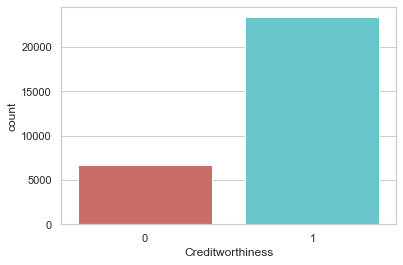

<Figure size 432x288 with 0 Axes>

In [7]:
sns.countplot(x ='Creditworthiness', data = taiwan_data, palette = 'hls')
plt.show()
plt.savefig('Creditworthiness')

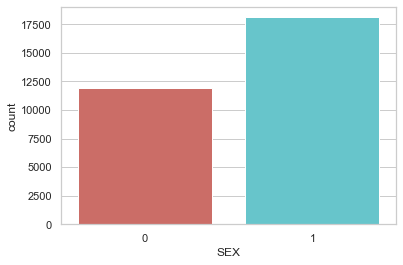

<Figure size 432x288 with 0 Axes>

In [8]:
sns.countplot(x ='SEX', data = taiwan_data, palette = 'hls')
plt.show()
plt.savefig('Creditworthiness')

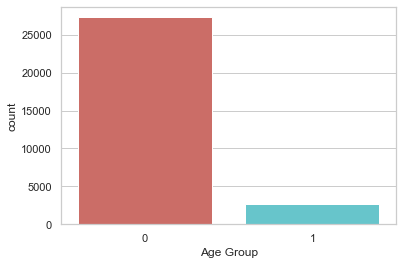

<Figure size 432x288 with 0 Axes>

In [13]:
sns.countplot(x ='Age Group', data = taiwan_data, palette = 'hls')
plt.show()
plt.savefig('Creditworthiness')

In [10]:
taiwan_data.isnull().values.any()

False

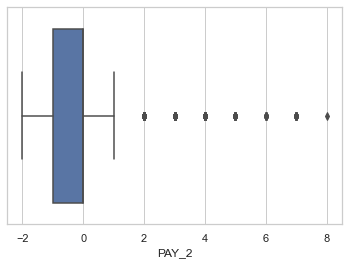

In [11]:
import seaborn as sns
sns.boxplot(x=taiwan_data['PAY_2'])

In [12]:
taiwan_data.to_csv(r'C:\Users\Majda\Downloads\Documents\MSc DSS\Thesis\taiwan_data.csv',index = False, header=True)